In [1]:
import geopandas as gpd

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [8]:
gdf = gpd.read_file("2022/business_improvement_districts.shp")
#From the data provided on BID's from the London Datastore, it was possible to look at only 2018-2022

In [9]:
gdf2020 = gpd.read_file("2020/business_improvement_districts.shp")

In [11]:
gdf2018 = gpd.read_file("2018/business_improvement_districts.shp")

In [27]:
gdf2019 = gpd.read_file("2019/business_improvement_districts.shp")

In [12]:
london_map = gpd.read_file('statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')

In [17]:
london_map = london_map.to_crs(epsg=27700)


In [18]:
joined_2022 = gpd.sjoin(gdf, london_map, how='left', op='intersects')

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [22]:
joined_2020 = gpd.sjoin(gdf2020, london_map, how='left', op='intersects')

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [28]:
joined_2019 = gpd.sjoin(gdf2019, london_map, how='left', op='intersects')

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [23]:
joined_2018 = gpd.sjoin(gdf2018, london_map, how='left', op='intersects')

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [20]:
import matplotlib.pyplot as plt

<AxesSubplot:>

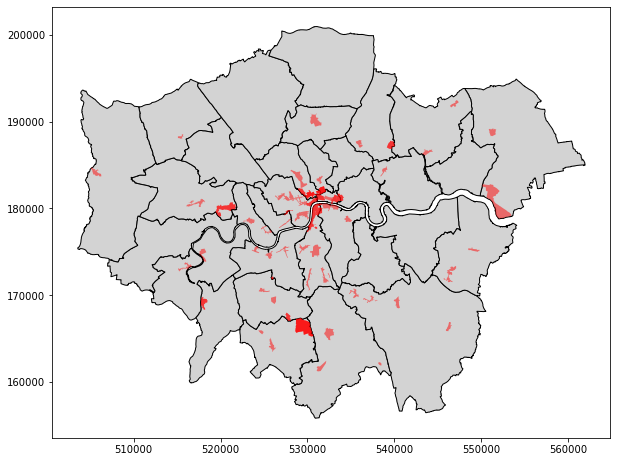

In [21]:
#Joining the gdf with the london map to portray where the BIDs were in 2022 and compare with the other years to see if there are any new ones
fig, ax = plt.subplots(figsize=(10, 10))
london_map.plot(ax=ax, color='lightgray', edgecolor='black')
joined_2022.plot(ax=ax, color='red', alpha=0.5)

<AxesSubplot:>

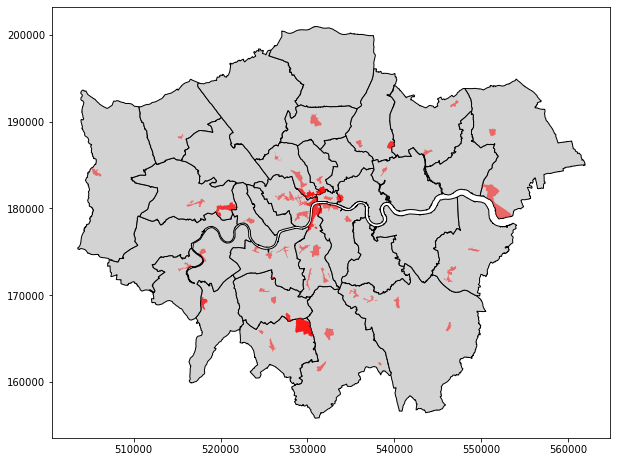

In [24]:
#Between 2020 and 2022 the only difference between the BIDs I can so far spot is near the center North
fig, ax = plt.subplots(figsize=(10, 10))
london_map.plot(ax=ax, color='lightgray', edgecolor='black')
joined_2020.plot(ax=ax, color='red', alpha=0.5)

<AxesSubplot:>

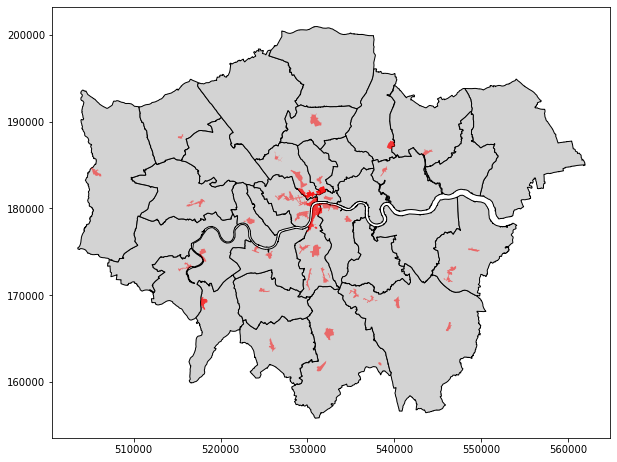

In [29]:
#Between 2019 - 2020 - and 2022, I can see the biggest difference here
fig, ax = plt.subplots(figsize=(10, 10))
london_map.plot(ax=ax, color='lightgray', edgecolor='black')
joined_2019.plot(ax=ax, color='red', alpha=0.5)

In [169]:
london_map.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [174]:
london_map.columns

Index(['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'SUB_2009',
       'SUB_2006', 'geometry'],
      dtype='object')

In [141]:
gdfolder_reproj = gdfolder.to_crs(london_map.crs)


In [152]:
gdfolder.head() 

,geometry
0,"POLYGON ((531764.771 183642.827, 531680.704 18..."
1,"POLYGON ((532772.752 180399.234, 532762.445 18..."
2,"POLYGON ((549793.896 175086.639, 549698.360 17..."
3,"POLYGON ((528155.075 184443.681, 528231.515 18..."
4,"POLYGON ((532063.483 166129.577, 532365.392 16..."


In [111]:
london_map = gpd.read_file('statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')

In [112]:
london_map1 = london_map.to_crs(gdf.crs)


In [115]:
london_map2 = london_map.to_crs(epsg=4326)


In [100]:
joined_gdf = gpd.sjoin(gdf, london_map, how='left', op='intersects')


/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<AxesSubplot:>

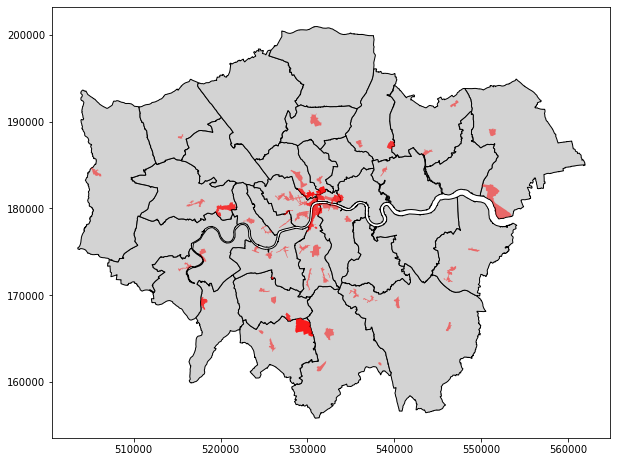

In [101]:
fig, ax = plt.subplots(figsize=(10, 10))
london_map.plot(ax=ax, color='lightgray', edgecolor='black')
joined_gdf.plot(ax=ax, color='red', alpha=0.5)


In [124]:
joined_gdf.head()

,OBJECTID,borough,bid_name,property_b,industrial,town_centr,weblink,updated,Shape_Leng,Shape_Area,geometry,index_right,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006
0,1,Islington,Angel AIM,None,None,Y,http://www.angelaim.org/,20171016,3120.671419,292779.281556,"POLYGON ((531764.771 183642.827, 531680.704 18...",27,Islington,E09000019,1485.664,0.000,T,None,None
1,2,Waltham Forest,Argall BID,None,Y,None,http://www.argallbid.co.uk/,20171016,3096.763617,378456.363393,"POLYGON ((535866.149 187308.195, 535852.808 18...",16,Waltham Forest,E09000031,3880.793,0.000,F,None,None
2,3,Southwark,Better Bankside,None,None,Y,http://www.betterbankside.co.uk/,20171016,3470.169506,507660.614663,"POLYGON ((532772.752 180399.234, 532762.445 18...",11,Southwark,E09000028,2991.340,105.139,T,None,None
3,4,Bexley,Bexleyheath BID,None,None,Y,http://www.bexleyheathbid.co.uk/,20171016,3701.830533,275868.573942,"POLYGON ((549793.896 175086.639, 549698.360 17...",14,Bexley,E09000004,6428.649,370.619,F,None,None
4,5,Camden,Camden Town Unlimited BID,None,None,Y,http://www.camdentownunlimited.com/,20171016,4475.975507,746547.488444,"POLYGON ((528155.075 184443.681, 528231.515 18...",25,Camden,E09000007,2178.932,0.000,T,None,None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


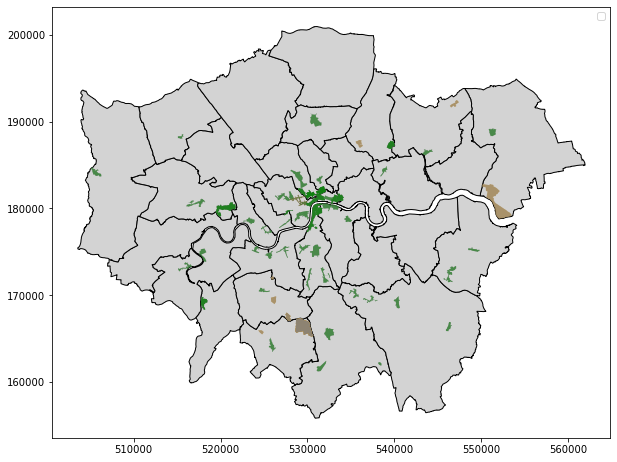

In [126]:
#seperating the types of BIDs out

# Define the color mapping dictionary
color_mapping = {
    'property_b': {
        'Y': 'red',
        None: 'gray'
    },
    'industrial': {
        'Y': 'orange',
        None: 'gray'
    },
    'town_centr': {
        'Y': 'green',
        None: 'gray'
    }
}


fig, ax = plt.subplots(figsize=(10, 10))

# Plotting the London map
london_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot each column with a different color
for column, color_dict in color_mapping.items():
    for value, color in color_dict.items():
        if value is not None:
            joined_gdf[joined_gdf[column] == value].plot(ax=ax, color=color, alpha=0.5, label=f'{column}: {value}')
        else:
            joined_gdf[joined_gdf[column].isnull()].plot(ax=ax, color=color, alpha=0.5, label=f'{column}: None')

# Add a legend
ax.legend()

# Display the plot
plt.show()


In [29]:
#gathering the percentage of each
percentage_y = {}

for column in ['property_b', 'industrial', 'town_centr']:
    counts = joined_gdf[column].value_counts()
    if 'Y' in counts.index:
        percentage = counts['Y'] / joined_gdf.shape[0] * 100
        percentage_y[column] = percentage
    else:
        percentage_y[column] = 0

print(percentage_y)

{'property_b': 3.260869565217391, 'industrial': 13.043478260869565, 'town_centr': 86.95652173913044}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


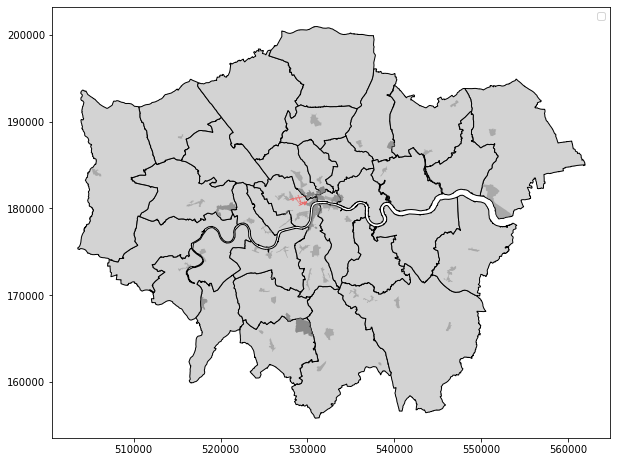

In [32]:
color_mapping = {
    'Y': 'red',
    None: 'gray'
}

# Plot the GeoDataFrame with color-coded 'property_b' column and the London map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the London map
london_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the 'property_b' column
for value, color in color_mapping.items():
    if value is not None:
        joined_gdf[joined_gdf['property_b'] == value].plot(ax=ax, color=color, alpha=0.5, label=f'property_b: {value}')
    else:
        joined_gdf[joined_gdf['property_b'].isnull()].plot(ax=ax, color=color, alpha=0.5, label='property_b: None')

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [33]:
property_b_y = joined_gdf[joined_gdf['property_b'] == 'Y']

# Print the filtered GeoDataFrame
print(property_b_y)

    OBJECTID      borough                 bid_name property_b industrial  \
21        22  Westminster  Piccadilly and St James          Y       None   
24        25  Westminster          Heart of London          Y       None   
27        28  Westminster     New West End Company          Y       None   

   town_centr                                            weblink   updated  \
21          Y  https://heartoflondonbid.london/documents/summ...  20171016   
24          Y                   https://heartoflondonbid.london/  20171016   
27          Y          https://newwestend.com/about-us/bid-area/  20171016   

      Shape_Leng     Shape_Area  \
21   2996.191427  124097.788368   
24   2586.633415  125174.152042   
27  14851.458194  434908.832152   

                                             geometry  index_right  \
21  POLYGON ((529514.311 180625.062, 529518.195 18...           24   
24  POLYGON ((529971.319 180580.395, 529903.066 18...           24   
27  POLYGON ((528939.219 181567

In [144]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [36]:
url = "http://www.angelaim.org/"
response = requests.get(url, verify=False)

html_content = response.text


/opt/conda/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.angelaim.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.angel.london'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [145]:
paddingtonurl = "https://paddingtonnow.co.uk/wp-content/uploads/2022/09/PaddingtonNow-Renewal-2023-2028_web_download.pdf"
response = requests.get(paddingtonurl, verify=False)

html_content = response.text

/opt/conda/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'paddingtonnow.co.uk'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [146]:
#attempting to see if it is possible to use elements of NLP for BID pattern finding
soup = BeautifulSoup(html_content, "html.parser")
text_content = soup.get_text()


In [41]:
#attempting to see if it is possible to use elements of NLP for BID pattern finding
soup = BeautifulSoup(html_content, "html.parser")
text_content = soup.get_text()


In [151]:
tokens = word_tokenize(text_content)


In [152]:
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]


In [153]:
fdist = FreqDist(filtered_tokens)


In [154]:
num_keywords = 10  # specify the number of keywords you want to extract
most_common_keywords = fdist.most_common(num_keywords)


In [155]:
for keyword, frequency in most_common_keywords:
    print(keyword, frequency)
#Create Sentiment Score

403 2
Forbidden 2
nginx 1


In [48]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [49]:
doc = nlp(text_content)


In [50]:
for entity in doc.ents:
    print(entity.text, entity.label_)


Angel London PERSON
London GPE
Angel




























Home ORG
BID ORG
BID ORG
46 CARDINAL
550 CARDINAL
Angel, Islington FAC
Angel FAC
BID ORG
four CARDINAL
CLEANER ORG
BRIGHTER PERSON
STRONGER ORG
Priorities ORG
the ‘Our Services LAW
annual DATE
BID ORG
Angel Responsible Business Network ORG
the Angel Responsible Business Network ORG
ARBN ORG
26 April DATE
Almost 50 CARDINAL
the Crafts Council Gallery ORG
first ORDINAL
Angel Business Crime Reduction Partnership ORG
11 CARDINAL
May DATE
the Angel Business Crime Summit ORG
earlier this year DATE
the Angel Business Crime Reduction Partnership ORG
first ORDINAL
ABCRP ORG
9am TIME
Thursday 11 DATE
Notice of Annual General Meeting ORG
Wednesday 17 May DATE
Wednesday 17 May DATE
the Executive Centre LOC
the Business Design Centre FAC
8am TIME
Highbury & Islington ORG
Greater London GPE
Highbury & Islington ORG
one CARDINAL
London GPE
Savills UK ORG
40 CARDINAL
London GPE
Spring Clean week DATE
17 CARDINAL
21 April DATE
17 CARDINAL

In [34]:
joined_2019.head()

,OBJECTID,borough,bid_name,property_b,industrial,town_centr,weblink,updated,Shape_Leng,Shape_Area,geometry,index_right,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006
0,1,Islington,Angel AIM,None,None,Y,http://www.angelaim.org/,2017-10-16,3120.671419,292779.281556,"POLYGON ((531764.771 183642.827, 531680.704 18...",27,Islington,E09000019,1485.664,0.000,T,None,None
1,3,Southwark,Better Bankside,None,None,Y,http://www.betterbankside.co.uk/,2017-10-16,3470.169506,507660.614663,"POLYGON ((532772.752 180399.234, 532762.445 18...",11,Southwark,E09000028,2991.340,105.139,T,None,None
2,4,Bexley,Bexleyheath BID,None,None,Y,http://www.bexleyheathbid.co.uk/,2017-10-16,3701.830533,275868.573942,"POLYGON ((549793.896 175086.639, 549698.360 17...",14,Bexley,E09000004,6428.649,370.619,F,None,None
3,5,Camden,Camden Town Unlimited BID,None,None,Y,http://www.camdentownunlimited.com/,2017-10-16,4475.975507,746547.488444,"POLYGON ((528155.075 184443.681, 528231.515 18...",25,Camden,E09000007,2178.932,0.000,T,None,None
4,6,Croydon,Croydon BID,None,None,Y,http://www.croydonbid.com/,2017-10-16,4904.061397,939959.704036,"POLYGON ((532063.483 166129.577, 532365.392 16...",1,Croydon,E09000008,8649.441,0.000,F,None,None


In [39]:
joined_2022.head()

,OBJECTID,borough,bid_name,property_b,industrial,town_centr,weblink,updated,Shape_Leng,Shape_Area,geometry,index_right,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006
0,1,Islington,Angel AIM,None,None,Y,http://www.angelaim.org/,20171016,3120.671419,292779.281556,"POLYGON ((531764.771 183642.827, 531680.704 18...",27,Islington,E09000019,1485.664,0.000,T,None,None
1,2,Waltham Forest,Argall BID,None,Y,None,http://www.argallbid.co.uk/,20171016,3096.763617,378456.363393,"POLYGON ((535866.149 187308.195, 535852.808 18...",16,Waltham Forest,E09000031,3880.793,0.000,F,None,None
2,3,Southwark,Better Bankside,None,None,Y,http://www.betterbankside.co.uk/,20171016,3470.169506,507660.614663,"POLYGON ((532772.752 180399.234, 532762.445 18...",11,Southwark,E09000028,2991.340,105.139,T,None,None
3,4,Bexley,Bexleyheath BID,None,None,Y,http://www.bexleyheathbid.co.uk/,20171016,3701.830533,275868.573942,"POLYGON ((549793.896 175086.639, 549698.360 17...",14,Bexley,E09000004,6428.649,370.619,F,None,None
4,5,Camden,Camden Town Unlimited BID,None,None,Y,http://www.camdentownunlimited.com/,20171016,4475.975507,746547.488444,"POLYGON ((528155.075 184443.681, 528231.515 18...",25,Camden,E09000007,2178.932,0.000,T,None,None


In [137]:
objectid1 = joined_2020['bid_name']
objectid2 = joined_2022['bid_name']


In [138]:
mutual_objectids = objectid1[objectid1.isin(objectid2)]


In [139]:
non_mutual_objectids = objectid1[~objectid1.isin(objectid2)]


In [140]:
print("Mutual OBJECTIDs:")
print(mutual_objectids)

print("Non-mutual OBJECTIDs:")
print(non_mutual_objectids)


Mutual OBJECTIDs:
0                     Angel AIM
1                    Argall BID
2               Better Bankside
3               Bexleyheath BID
4     Camden Town Unlimited BID
                ...            
63                   Algate BID
63                   Algate BID
64                    Acton BID
64                    Acton BID
65         Clapham Junction BID
Name: bid_name, Length: 78, dtype: object
Non-mutual OBJECTIDs:
26                     Bee-Midtown
26                     Bee-Midtown
26                     Bee-Midtown
47    Farringdon & Clerkenwell BID
47    Farringdon & Clerkenwell BID
47    Farringdon & Clerkenwell BID
48           Hampstead Village BID
Name: bid_name, dtype: object


In [48]:
import geopandas as gpd

# Extract the bid names from each GeoDataFrame
bid_names_2019 = set(joined_2019['bid_name'])
bid_names_2022 = set(joined_2022['bid_name'])

# Find the mutual bid names
mutual_bid_names = bid_names_2019.intersection(bid_names_2022)

# Find the non-mutual bid names
non_mutual_bid_names = bid_names_2019.symmetric_difference(bid_names_2022)

# Print the mutual bid names
print("Mutual bid names:")
print(mutual_bid_names)

# Print the non-mutual bid names
print("Non-mutual bid names:")
print(non_mutual_bid_names)


Mutual bid names:
{'Orpington 1st', 'Twickenham BID', 'Paddington Now', 'Richmond BID', 'New West End Company', 'Cheapside', 'Northbank BID', 'Wandsworth Town BID', 'Uxbridge BID', 'Beckenham', 'Purley BID', 'Ilford BID', 'The Fitzrovia Partnership', 'South Bank BID', 'Team London Bridge', 'Bexleyheath BID', 'Victoria BID', 'Brixton BID', 'West Ealing BID', 'Ealing BID', 'WeAreWaterloo', 'Harrow Town Centre', 'Bromley BID', 'Croydon BID', 'Clapham BID', 'Vauxhall One', 'Love Wimbledon', 'Euston Town BID', 'Streatham BID', 'Angel AIM', 'Better Bankside', 'E11bid', 'Baker Street Quarter', 'Kingston First', 'Victoria', 'Hatton Garden BID', 'Blue Bermondsey BID', 'Penge', 'HammersmithLondon', 'Marble Arch BID', 'Putney BID', 'Wood Green BID', 'Camden Town Unlimited BID', 'Successful Sutton', 'Stratford Original', 'New Addington', 'Heart of London', 'Sidcup BID', 'Piccadilly and St James'}
Non-mutual bid names:
{'London Riverside BID', 'Kimpton Industrial Park', 'Fleet Street Quarter', 'Kin

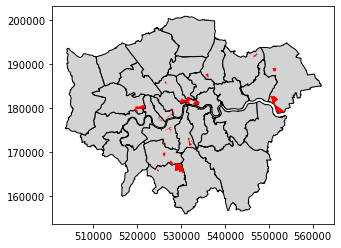

In [51]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Plot the background map
london_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Filter the GeoDataFrames based on non-mutual bid names
non_mutual_2019 = joined_2019[joined_2019['bid_name'].isin(non_mutual_bid_names)]
non_mutual_2022 = joined_2022[joined_2022['bid_name'].isin(non_mutual_bid_names)]

# Create a new GeoDataFrame with the non-mutual bid names
non_mutual_gdf = gpd.GeoDataFrame(pd.concat([non_mutual_2019, non_mutual_2022], ignore_index=True))

# Plot the non-mutual bid names on top of the background map
non_mutual_gdf.plot(ax=ax, color='red')

# Display the plot
plt.show()


In [59]:
sheets_dict = pd.read_excel('interactiveresults.xlsx', sheet_name=None, header= 2)

# Access individual sheets by their keys
sheet1_data = sheets_dict['Definitions and Methodology']
sheet2_data = sheets_dict['Dashboard']
sheet3_data = sheets_dict['Borough Summary']

/opt/conda/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/conda/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/opt/conda/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


In [60]:
sheet3_data.head() 

,Unnamed: 0,Borough Code,Borough,Business density,Micro-share,Rateable properties per business,GVA per business,Business diversity,Complexity,Unnamed: 9,Borough.1,Business count,Business density,Micro-share.1,Rateable properties per business.1,GVA per business.1,Business diversity.1,Complexity.1
0,East,E09000002,Barking and Dagenham,0.839193,6.026379,5.930935,1.574545,9.591944,0.000000,NaN,Barking and Dagenham,7790.0,0.155800,0.883184,0.498331,0.512883,0.242698,0.458877
1,West,E09000003,Barnet,2.009555,8.865361,0.349889,0.860765,8.018229,3.137527,NaN,Barnet,24820.0,0.221607,0.913175,0.326551,0.444202,0.274886,0.791628
2,East,E09000004,Bexley,0.268081,5.508819,5.300560,1.659619,6.334072,5.081881,NaN,Bexley,9895.0,0.123688,0.877716,0.478929,0.521069,0.309333,0.997837
3,West,E09000005,Brent,1.117672,7.135148,5.444320,2.233288,9.971185,3.180732,NaN,Brent,16460.0,0.171458,0.894897,0.483354,0.576269,0.234941,0.796210
4,East,E09000006,Bromley,0.577302,7.157957,2.113822,1.025950,6.067322,1.022378,NaN,Bromley,17070.0,0.141074,0.895138,0.380844,0.460097,0.314789,0.567306


/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


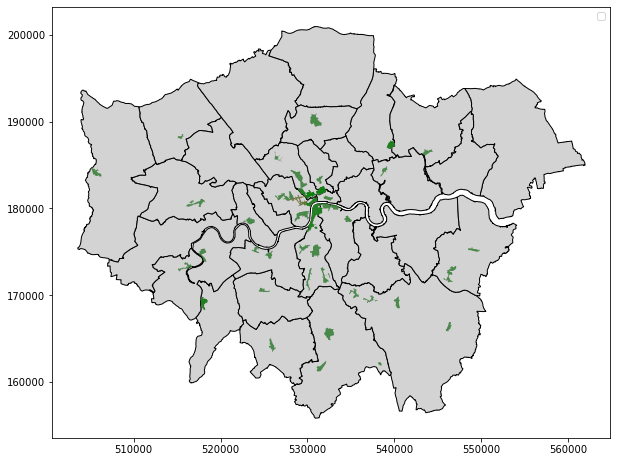

In [61]:


# Define the color mapping dictionary
color_mapping = {
    'property_b': {
        'Y': 'red',
        None: 'gray'
    },
    'industrial': {
        'Y': 'orange',
        None: 'gray'
    },
    'town_centr': {
        'Y': 'green',
        None: 'gray'
    }
}

# Plot the GeoDataFrame with color-coded columns and the London map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the London map
london_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot each column with a different color
for column, color_dict in color_mapping.items():
    for value, color in color_dict.items():
        if value is not None:
            joined_2019[joined_2019[column] == value].plot(ax=ax, color=color, alpha=0.5, label=f'{column}: {value}')
        else:
            joined_2019[joined_2019[column].isnull()].plot(ax=ax, color=color, alpha=0.5, label=f'{column}: None')

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [62]:
joined_2019.head()

,OBJECTID,borough,bid_name,property_b,industrial,town_centr,weblink,updated,Shape_Leng,Shape_Area,geometry,index_right,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006
0,1,Islington,Angel AIM,None,None,Y,http://www.angelaim.org/,2017-10-16,3120.671419,292779.281556,"POLYGON ((531764.771 183642.827, 531680.704 18...",27,Islington,E09000019,1485.664,0.000,T,None,None
1,3,Southwark,Better Bankside,None,None,Y,http://www.betterbankside.co.uk/,2017-10-16,3470.169506,507660.614663,"POLYGON ((532772.752 180399.234, 532762.445 18...",11,Southwark,E09000028,2991.340,105.139,T,None,None
2,4,Bexley,Bexleyheath BID,None,None,Y,http://www.bexleyheathbid.co.uk/,2017-10-16,3701.830533,275868.573942,"POLYGON ((549793.896 175086.639, 549698.360 17...",14,Bexley,E09000004,6428.649,370.619,F,None,None
3,5,Camden,Camden Town Unlimited BID,None,None,Y,http://www.camdentownunlimited.com/,2017-10-16,4475.975507,746547.488444,"POLYGON ((528155.075 184443.681, 528231.515 18...",25,Camden,E09000007,2178.932,0.000,T,None,None
4,6,Croydon,Croydon BID,None,None,Y,http://www.croydonbid.com/,2017-10-16,4904.061397,939959.704036,"POLYGON ((532063.483 166129.577, 532365.392 16...",1,Croydon,E09000008,8649.441,0.000,F,None,None


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


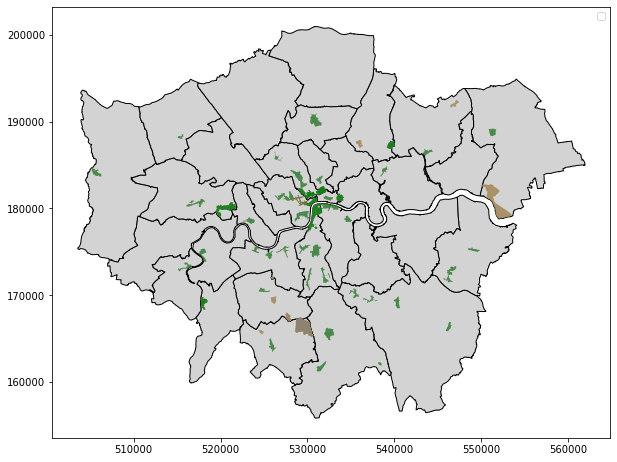

In [63]:


# Define the color mapping dictionary
color_mapping = {
    'property_b': {
        'Y': 'red',
        None: 'gray'
    },
    'industrial': {
        'Y': 'orange',
        None: 'gray'
    },
    'town_centr': {
        'Y': 'green',
        None: 'gray'
    }
}

# Plot the GeoDataFrame with color-coded columns and the London map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the London map
london_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot each column with a different color
for column, color_dict in color_mapping.items():
    for value, color in color_dict.items():
        if value is not None:
            joined_2020[joined_2020[column] == value].plot(ax=ax, color=color, alpha=0.5, label=f'{column}: {value}')
        else:
            joined_2020[joined_2020[column].isnull()].plot(ax=ax, color=color, alpha=0.5, label=f'{column}: None')

# Add a legend
ax.legend()

# Display the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


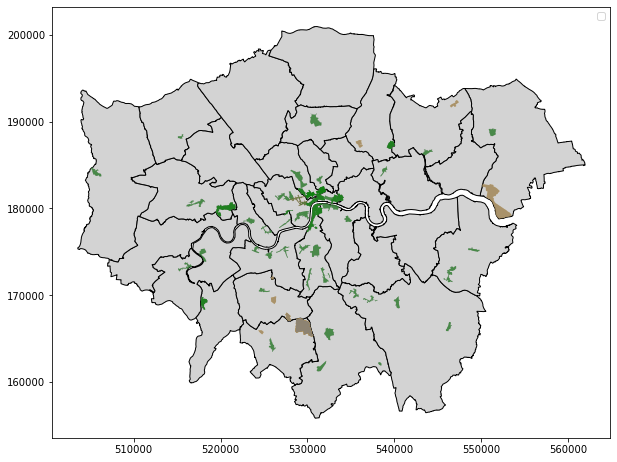

In [64]:


# Define the color mapping dictionary
color_mapping = {
    'property_b': {
        'Y': 'red',
        None: 'gray'
    },
    'industrial': {
        'Y': 'orange',
        None: 'gray'
    },
    'town_centr': {
        'Y': 'green',
        None: 'gray'
    }
}

# Plot the GeoDataFrame with color-coded columns and the London map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the London map
london_map.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot each column with a different color
for column, color_dict in color_mapping.items():
    for value, color in color_dict.items():
        if value is not None:
            joined_2022[joined_2022[column] == value].plot(ax=ax, color=color, alpha=0.5, label=f'{column}: {value}')
        else:
            joined_2022[joined_2022[column].isnull()].plot(ax=ax, color=color, alpha=0.5, label=f'{column}: None')

# Add a legend
ax.legend()

# Display the plot
plt.show()

In [65]:
percentage_y = {}

for column in ['property_b', 'industrial', 'town_centr']:
    counts = joined_2019[column].value_counts()
    if 'Y' in counts.index:
        percentage = counts['Y'] / joined_2019.shape[0] * 100
        percentage_y[column] = percentage
    else:
        percentage_y[column] = 0

print(percentage_y)

{'property_b': 4.477611940298507, 'industrial': 0, 'town_centr': 100.0}


In [66]:
percentage_y = {}

for column in ['property_b', 'industrial', 'town_centr']:
    counts = joined_2022[column].value_counts()
    if 'Y' in counts.index:
        percentage = counts['Y'] / joined_2022.shape[0] * 100
        percentage_y[column] = percentage
    else:
        percentage_y[column] = 0

print(percentage_y)

{'property_b': 3.260869565217391, 'industrial': 13.043478260869565, 'town_centr': 86.95652173913044}


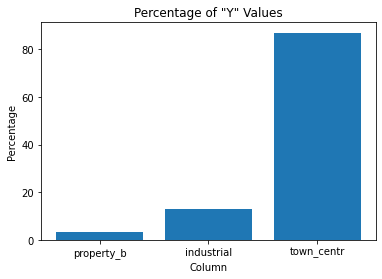

In [67]:
plt.bar(percentage_y.keys(), percentage_y.values())
plt.xlabel('Column')
plt.ylabel('Percentage')
plt.title('Percentage of "Y" Values')
plt.show()

{'joined_2019': {'property_b': 4.477611940298507, 'industrial': 0, 'town_centr': 100.0}, 'joined_2020': {'property_b': 3.5294117647058822, 'industrial': 14.117647058823529, 'town_centr': 85.88235294117646}, 'joined_2022': {'property_b': 3.260869565217391, 'industrial': 13.043478260869565, 'town_centr': 86.95652173913044}}


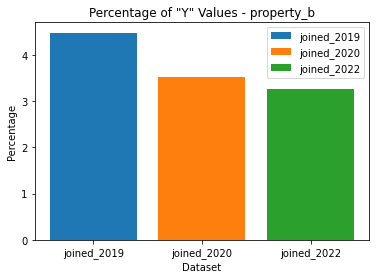

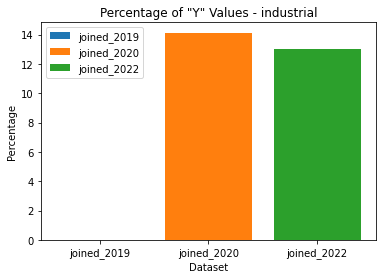

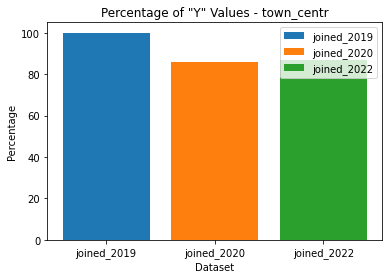

In [68]:
datasets = {
    'joined_2019': joined_2019,
    'joined_2020': joined_2020,
    'joined_2022': joined_2022
}

percentage_y = {}

for dataset_name, dataset in datasets.items():
    percentage_y[dataset_name] = {}
    for column in ['property_b', 'industrial', 'town_centr']:
        counts = dataset[column].value_counts()
        if 'Y' in counts.index:
            percentage = counts['Y'] / dataset.shape[0] * 100
            percentage_y[dataset_name][column] = percentage
        else:
            percentage_y[dataset_name][column] = 0

print(percentage_y)

# Plot bar graphs for each dataset
for column in ['property_b', 'industrial', 'town_centr']:
    plt.figure()
    for dataset_name, percentages in percentage_y.items():
        plt.bar(dataset_name, percentages[column], label=dataset_name)
    plt.xlabel('Dataset')
    plt.ylabel('Percentage')
    plt.title(f'Percentage of "Y" Values - {column}')
    plt.legend()
    plt.show()


{'joined_2019': {'property_b': 4.477611940298507, 'industrial': 0, 'town_centr': 100.0}, 'joined_2020': {'property_b': 3.5294117647058822, 'industrial': 14.117647058823529, 'town_centr': 85.88235294117646}, 'joined_2022': {'property_b': 3.260869565217391, 'industrial': 13.043478260869565, 'town_centr': 86.95652173913044}}


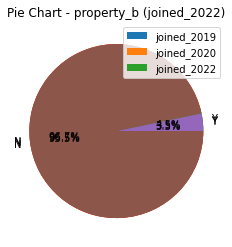

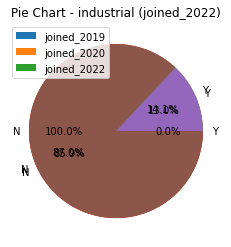

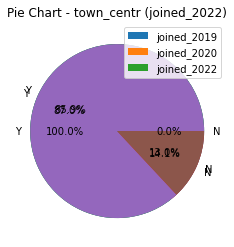

In [74]:
for dataset_name, dataset in datasets.items():
    percentage_y[dataset_name] = {}
    for column in ['property_b', 'industrial', 'town_centr']:
        counts = dataset[column].value_counts()
        if 'Y' in counts.index:
            percentage = counts['Y'] / dataset.shape[0] * 100
            percentage_y[dataset_name][column] = percentage
        else:
            percentage_y[dataset_name][column] = 0

print(percentage_y)

# Plot pie charts for each dataset and column
for column in ['property_b', 'industrial', 'town_centr']:
    plt.figure()
    for dataset_name, percentages in percentage_y.items():
        plt.pie([percentages[column], 100-percentages[column]], labels=['Y', 'N'], autopct='%1.1f%%')
        plt.title(f'Pie Chart - {column} ({dataset_name})')
    plt.legend(datasets.keys())
    plt.show()

{'joined_2019': {'property_b': 4.477611940298507, 'industrial': 0, 'town_centr': 100.0}, 'joined_2020': {'property_b': 3.5294117647058822, 'industrial': 14.117647058823529, 'town_centr': 85.88235294117646}, 'joined_2022': {'property_b': 3.260869565217391, 'industrial': 13.043478260869565, 'town_centr': 86.95652173913044}}


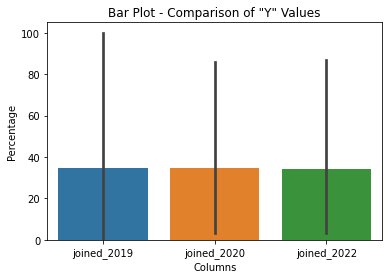

In [76]:

import seaborn as sns

percentage_y = {}

for dataset_name, dataset in datasets.items():
    percentage_y[dataset_name] = {}
    for column in ['property_b', 'industrial', 'town_centr']:
        counts = dataset[column].value_counts()
        if 'Y' in counts.index:
            percentage = counts['Y'] / dataset.shape[0] * 100
            percentage_y[dataset_name][column] = percentage
        else:
            percentage_y[dataset_name][column] = 0

print(percentage_y)

# Convert the percentage_y dictionary into a DataFrame
df_percentage = pd.DataFrame(percentage_y)

# Plot a bar plot using seaborn
sns.barplot(data=df_percentage)
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Bar Plot - Comparison of "Y" Values')
plt.show()

{'property_b': {'joined_2019': 4.477611940298507, 'joined_2020': 3.5294117647058822, 'joined_2022': 3.260869565217391}, 'industrial': {'joined_2019': 0, 'joined_2020': 14.117647058823529, 'joined_2022': 13.043478260869565}, 'town_centr': {'joined_2019': 100.0, 'joined_2020': 85.88235294117646, 'joined_2022': 86.95652173913044}}


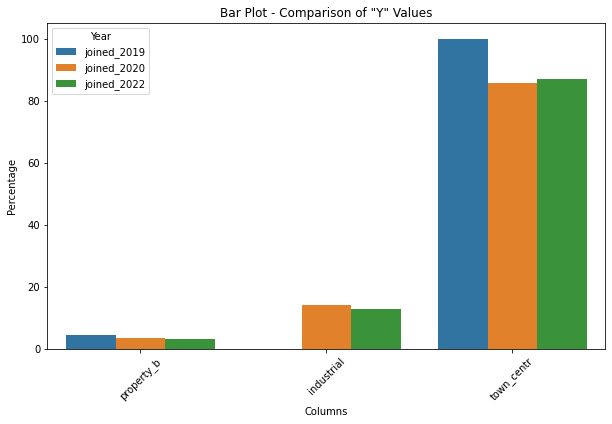

In [79]:
datasets = {
    'joined_2019': joined_2019,
    'joined_2020': joined_2020,
    'joined_2022': joined_2022
}

percentage_y = {}

for dataset_name, dataset in datasets.items():
    for column in ['property_b', 'industrial', 'town_centr']:
        counts = dataset[column].value_counts()
        if 'Y' in counts.index:
            percentage = counts['Y'] / dataset.shape[0] * 100
            if column in percentage_y:
                percentage_y[column][dataset_name] = percentage
            else:
                percentage_y[column] = {dataset_name: percentage}
        else:
            if column in percentage_y:
                percentage_y[column][dataset_name] = 0
            else:
                percentage_y[column] = {dataset_name: 0}

print(percentage_y)

# Convert the percentage_y dictionary into a DataFrame
df_percentage = pd.DataFrame(percentage_y)

# Plot a bar plot using seaborn
df_percentage = df_percentage.transpose().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_percentage.melt(id_vars='index', var_name='Year', value_name='Percentage'),
            x='index', y='Percentage', hue='Year')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Bar Plot - Comparison of "Y" Values')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()

In [110]:
df_2019 = pd.read_excel("Qualifications-by-economic-activity-status-borough.xlsx", sheet_name='2019',header = 0)
df_2018 = pd.read_excel("Qualifications-by-economic-activity-status-borough.xlsx", sheet_name='2018')
df_2017 = pd.read_excel("Qualifications-by-economic-activity-status-borough.xlsx", sheet_name='2017')

In [105]:
df_2019.head()

,Unnamed: 0,Unnamed: 1,% of economically active with NVQ4+ - working age,Unnamed: 3,Unnamed: 4,Unnamed: 5,% of economically active with NVQ4+ - working age males,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 76,Unnamed: 77,% of economically active with no qualifications - working age males,Unnamed: 79,Unnamed: 80,Unnamed: 81,% of economically active with no qualifications - working age females,Unnamed: 83,Unnamed: 84,Unnamed: 85
0,Code,Area,number,denominator,percent,confidence,number,denominator,percent,confidence,...,percent,confidence,number,denominator,percent,confidence,number,denominator,percent,confidence
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00AA,City of London,7400,7400,100,-,4800,4800,100,-,...,!,!,!,4800,!,!,!,!,!,!
3,00AB,Barking and Dagenham,40100,101900,39.4,5.6,19800,55700,35.6,7.6,...,5.8,2.7,4700,55700,8.5,4.4,1200,46200,2.7,*
4,00AC,Barnet,120100,202500,59.3,5.5,61600,106600,57.8,7.9,...,2.4,*,3400,106600,3.2,*,1500,95900,1.6,*


In [109]:
df_2019.columns

Index(['Unnamed: 0', '% of economically active with NVQ4+ - working age',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       '% of economically active with NVQ4+ - working age males', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9',
       '% of economically active with NVQ4+ - working age females',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       '% of economically active with NVQ3 only - working age', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17',
       '% of economically active with NVQ3 only - working age males',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       '% of economically active with NVQ3 only - working age females',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       '% of economically active with Trade Apprenticeships - working age',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       '% of economically active with Trade Apprenticeships - working age males',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       '% of econo

In [98]:
joined_2019.head()

,OBJECTID,borough,bid_name,property_b,industrial,town_centr,weblink,updated,Shape_Leng,Shape_Area,geometry,index_right,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006
0,1,Islington,Angel AIM,None,None,Y,http://www.angelaim.org/,2017-10-16,3120.671419,292779.281556,"POLYGON ((531764.771 183642.827, 531680.704 18...",27,Islington,E09000019,1485.664,0.000,T,None,None
1,3,Southwark,Better Bankside,None,None,Y,http://www.betterbankside.co.uk/,2017-10-16,3470.169506,507660.614663,"POLYGON ((532772.752 180399.234, 532762.445 18...",11,Southwark,E09000028,2991.340,105.139,T,None,None
2,4,Bexley,Bexleyheath BID,None,None,Y,http://www.bexleyheathbid.co.uk/,2017-10-16,3701.830533,275868.573942,"POLYGON ((549793.896 175086.639, 549698.360 17...",14,Bexley,E09000004,6428.649,370.619,F,None,None
3,5,Camden,Camden Town Unlimited BID,None,None,Y,http://www.camdentownunlimited.com/,2017-10-16,4475.975507,746547.488444,"POLYGON ((528155.075 184443.681, 528231.515 18...",25,Camden,E09000007,2178.932,0.000,T,None,None
4,6,Croydon,Croydon BID,None,None,Y,http://www.croydonbid.com/,2017-10-16,4904.061397,939959.704036,"POLYGON ((532063.483 166129.577, 532365.392 16...",1,Croydon,E09000008,8649.441,0.000,F,None,None


In [101]:
joined_2019.columns

Index(['OBJECTID', 'borough', 'bid_name', 'property_b', 'industrial',
       'town_centr', 'weblink', 'updated', 'Shape_Leng', 'Shape_Area',
       'geometry', 'index_right', 'NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA',
       'ONS_INNER', 'SUB_2009', 'SUB_2006'],
      dtype='object')

In [111]:
df_2019['borough'] = df_2019['Unnamed: 1']
df_2019.drop(columns=['Unnamed: 1'], inplace=True)

# Perform the join operation
merged_df = pd.merge(df_2019, joined_2019, on='borough', how='inner')

In [113]:
gdf_merged = gpd.GeoDataFrame(merged_df, geometry='geometry')

# Map the column "% of economically active with NVQ4+ - working age" to the GeoDataFrame
gdf_merged['NVQ4_percent'] = gdf_merged['Unnamed: 4']

# Print the GeoDataFrame to verify the mapping
print(gdf_merged.head())

  Unnamed: 0 % of economically active with NVQ4+ - working age   Unnamed: 3  \
0       Code                                            number  denominator   
1        NaN                                               NaN          NaN   
2        NaN                                               NaN          NaN   
3        NaN                                               NaN          NaN   
4        NaN                                               NaN          NaN   

  Unnamed: 4  Unnamed: 5  \
0    percent  confidence   
1        NaN         NaN   
2        NaN         NaN   
3        NaN         NaN   
4        NaN         NaN   

  % of economically active with NVQ4+ - working age males   Unnamed: 7  \
0                                             number       denominator   
1                                                NaN               NaN   
2                                                NaN               NaN   
3                                                NaN        

In [122]:
london_map.columns

Index(['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'SUB_2009',
       'SUB_2006', 'geometry'],
      dtype='object')

In [129]:
merged_map = london_map.merge(gdf_merged, left_on='GSS_CODE', right_on='GSS_CODE')



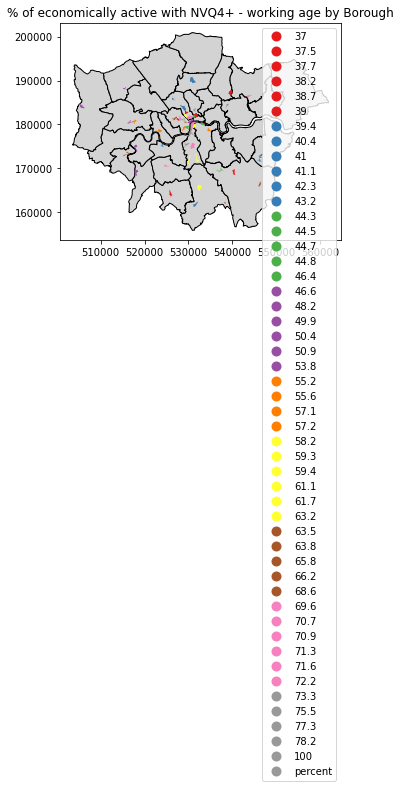

In [132]:
# trying to look at where there is already I highly economically active presence within the boroughs 
# Create a categorical color map based on unique values in 'NVQ4_percent' column
categorical_cmap = plt.cm.get_cmap('Set1', len(gdf_merged['NVQ4_percent'].unique()))

# Plotting the London map with gray color
ax = london_map.plot(color='lightgray', edgecolor='black')

# Plotting the NVQ4+ data as an overlay with categorical colors
gdf_merged.plot(column='NVQ4_percent', cmap=categorical_cmap, linewidth=0.8, ax=ax, legend=True)

# Adding a title
plt.title('% of economically active with NVQ4+ - working age by Borough')

# Displaying the plot
plt.show()

#vacancy - data for 
# how do you measure - 

In [2]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [3]:
camden = pd.read_excel('Camdendata.xlsx')


In [5]:
lambeth = pd.read_csv('Lambethdata.csv')

In [8]:
cityofldn = pd.read_excel('CityofLDN.xls')

In [105]:
activity = pd.read_excel('ggleactivity.xlsx', header=1)

In [177]:
barnet = pd.read_csv('Barnet.csv')

In [178]:
greenwich = pd.read_csv('Greenwich.csv')

In [180]:
hackney = pd.read_csv('Hackney.csv')

/tmp/ipykernel_256/2057310667.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  hackney = pd.read_csv('Hackney.csv')


In [181]:
hackney.head

<bound method NDFrame.head of                                           id         uarn  billingAuthority  \
0       1cb8aec8-2aa6-4dbd-96ec-01b7a4374997      3185068              5360   
1       0048ec01-00c7-47b2-8d81-bf59bc58fa33      3213068              5360   
2       dc3f6856-8340-4953-b593-91d26735e2e4      3221068              5360   
3       cea2fe38-a737-440d-8c0b-e01e74f4b218      3225068              5360   
4       9bc0c280-8f35-4e5f-9556-8592a5b5e80b      3233068              5360   
...                                      ...          ...               ...   
483097  15907731-cdeb-475e-8a5e-23c84ef9f00b  13648040000              5360   
483098  4764b6a1-69f7-45e2-8716-dbc775b06336  13648043000              5360   
483099  c99bf786-9fd5-4d08-8807-923c4dd615a3  13649121000              5360   
483100  96972946-2203-4abd-b194-ec1236148321  13656864000              5360   
483101  4979b3aa-4aa2-4820-a5b9-1dcf71f87e5b  13656866000              5360   

       billingReferen

In [106]:
activity.head()

,Unnamed: 0,date,area_name,area_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,33115,2022-10-15,Kingston upon Thames,E09000021,-20.0,-3.0,69.0,-5,-1.0,1.0
1,13635,2022-10-15,Hammersmith and Fulham,E09000013,-30.0,-9.0,3.0,-31,-23.0,1.0
2,12661,2022-10-15,Hackney,E09000012,-24.0,-8.0,-8.0,-24,-17.0,0.0
3,3895,2022-10-15,Barking and Dagenham,E09000002,-17.0,2.0,27.0,-6,-19.0,0.0
4,28245,2022-10-15,Tower Hamlets,E09000030,-13.0,-2.0,-9.0,-17,-9.0,0.0


In [9]:
cityofldn.head()

,id,uarn,billingAuthority,billingReference,address,town,postcode,geometry,codeCategory,useCategory,...,category,floorArea,rentalValuation,name,status,ratesPaid,statusDate,statusDuration,period,geocode
0,c92143ba-8c36-46f2-9723-cef5d782d200,14614052,5030,130940023,PT BST & PT GND F BOUVERIE HSE NAT PROVINCIAL ...,LONDON,EC4A 2DQ,POINT (-0.107838 51.514372),21,Banks/Insurance/Building Society Offices & Oth...,...,RETAIL,346.65,63000,NATIONAL WESTMINSTER BANK PLC,True,42930.0,1995-04-01 00:00:00+00:00,5478.0,2010-03-31,E09000001
1,a51e69b9-509f-4458-a3b1-d0332dde0198,14655052,5030,137310509,3RD F 15 NEW BRIDGE STREET,LONDON,EC4V 6AU,POINT (-0.104572 51.512844),203,Offices (Inc Computer Centres),...,OFFICE,134.60,35250,NaN,True,NaN,2009-11-30 00:00:00+00:00,5478.0,2010-03-31,E09000001
2,6a19a200-6d96-4628-8956-6d1b5d0d3150,16277052,5030,405091171,BST GND & 1ST-2ND FS TOKEN HSE 14-18 COPTHALL ...,LONDON,EC2R 7DJ,POINT (-0.087564 51.516327),203,Offices (Inc Computer Centres),...,OFFICE,449.80,102000,NaN,True,NaN,2010-01-19 00:00:00+00:00,5478.0,2010-03-31,E09000001
3,7c320321-e1a0-4bbf-881d-6df41bd1dedb,18638052,5030,141900159,3 PAIR 1 CROWN OFFICE ROW TEMPLE,LONDON,EC4Y 7HH,POINT (-0.110468 51.512537),203,Offices (Inc Computer Centres),...,OFFICE,135.40,33250,NaN,True,NaN,2009-10-20 00:00:00+00:00,2732.0,2010-03-31,E09000001
4,701a7356-346e-43af-8ffa-7b2365ad9eec,18771052,5030,0000014190380A,2 PAIR S 3 HARE COURT TEMPLE,LONDON,EC4Y 7BE,POINT (-0.110832 51.513062),203,Offices (Inc Computer Centres),...,OFFICE,87.59,19500,NaN,True,NaN,2009-12-11 00:00:00+00:00,5478.0,2010-03-31,E09000001


In [6]:
lambeth.head()

,id,uarn,billingAuthority,billingReference,address,town,postcode,geometry,codeCategory,useCategory,...,category,floorArea,rentalValuation,name,status,ratesPaid,statusDate,statusDuration,period,geocode
0,ed8d0a1d-3fd3-476b-8531-8012cedf5a69,274075,5660,3.00004E+11,42 ABBEVILLE ROAD,LONDON,SW4 9NG,POINT (-0.139863 51.454166),249,Shops,...,RETAIL,49.60,18000,NaN,True,NaN,2009-11-23 00:00:00+00:00,905.0,31/03/2010,E09000022
1,5b5b5ba8-6177-4e51-86a6-ca4fc43d1fed,8267075,5660,0125000070000A,7 BISHOPS TERRACE,LONDON,SE11 4UE,POINT (-0.11022 51.493359),203,Offices (Inc Computer Centres),...,OFFICE,155.66,29250,NaN,True,NaN,2010-03-08 00:00:00+00:00,1460.0,31/03/2010,E09000022
2,57b914a0-d566-4bce-a513-8cd9790474c2,10702075,5660,0450002260001B,226 BRIXTON HILL,LONDON,SW2 1HE,POINT (-0.124027 51.448977),249,Shops,...,RETAIL,67.80,8500,NaN,True,NaN,2010-01-08 00:00:00+00:00,309.0,31/03/2010,E09000022
3,3b57879f-c233-4429-82b4-21d2e359ab00,10747075,5660,04500280A00001,280A BRIXTON HILL,LONDON,SW2 1HT,POINT (-0.124562 51.445848),249,Shops,...,RETAIL,104.70,8400,NaN,True,NaN,2010-01-14 00:00:00+00:00,372.0,31/03/2010,E09000022
4,6f1867f6-c638-4371-ac1a-b70d6e783b11,12423075,5660,4.56E+12,30 BRIXTON STATION ROAD,LONDON,SW9 8PD,POINT (-0.111669 51.480262),249,Shops,...,RETAIL,51.77,11250,NaN,True,NaN,2009-11-27 00:00:00+00:00,364.0,31/03/2010,E09000022


In [7]:
camden.head()

,id,uarn,billingAuthority,billingReference,statusDate,address,town,postcode,geometry,codeCategory,...,subCategory,category,floorArea,rentalValuation,status,ratesPaid,statusDuration,period,name,geocode
0,b875f6e3-566e-4624-b8a0-a504b551db8c,4697063,5210,21733010101,2010-03-05 00:00:00+00:00,180 ARLINGTON ROAD,LONDON,NW1 7HL,POINT (-0.143902 51.538808),25,...,LEISURE_AMUSEMENT_AND_ENTERTAINMENT_CENTRES,LEISURE,NaN,104500,True,NaN,NaN,2010-03-31,NaN,E09000007
1,9c27972b-dffc-48ec-9e3e-3812accd5de0,6462063,5210,0073700011000B,2010-03-18 00:00:00+00:00,1 BAYHAM STREET,LONDON,NW1 0ER,POINT (-0.137797 51.534958),203,...,OFFICE_GENERAL,OFFICE,201.30,45250,True,NaN,NaN,2010-03-31,NaN,E09000007
2,633a9ae4-85f0-42b2-89c4-0005f420bd7b,6474063,5210,007370007B0012,2010-03-18 00:00:00+00:00,7B BAYHAM STREET,LONDON,NW1 0EY,POINT (-0.138309 51.535497),203,...,OFFICE_GENERAL,OFFICE,59.30,15750,True,NaN,NaN,2010-03-31,NaN,E09000007
3,52159b1f-d7b8-4681-9048-319502b7ffb4,6664063,5210,426000910011,2010-02-23 00:00:00+00:00,9 BAYNES MEWS,LONDON,NW3 5BH,POINT (-0.172747 51.548766),96,...,INDUSTRIAL_GENERAL,INDUSTRIAL,47.28,10000,True,NaN,NaN,2010-03-31,NaN,E09000007
4,40d287ac-e6ca-49fd-9712-f188cd2476e2,7015063,5210,0109000010001A,2009-12-01 00:00:00+00:00,1 BEDFORD SQUARE,LONDON,WC1B 3RA,POINT (-0.129063 51.51948),203,...,OFFICE_GENERAL,OFFICE,397.60,131000,True,NaN,NaN,2010-03-31,NaN,E09000007


In [91]:
camden.col()

AttributeError: 'DataFrame' object has no attribute 'col'

In [11]:
from shapely.wkt import loads
camden['geometry'] = camden['geometry'].apply(lambda x: loads(x))
camden['longitude'] = camden['geometry'].apply(lambda point: point.x)
camden['latitude'] = camden['geometry'].apply(lambda point: point.y)

# Convert DataFrame to GeoDataFrame
points = gpd.GeoDataFrame(df, geometry='geometry')

# Verify the resulting GeoDataFrame
print(points.head())

                                     id     uarn  billingAuthority  \
0  b875f6e3-566e-4624-b8a0-a504b551db8c  4697063              5210   
1  9c27972b-dffc-48ec-9e3e-3812accd5de0  6462063              5210   
2  633a9ae4-85f0-42b2-89c4-0005f420bd7b  6474063              5210   
3  52159b1f-d7b8-4681-9048-319502b7ffb4  6664063              5210   
4  40d287ac-e6ca-49fd-9712-f188cd2476e2  7015063              5210   

  billingReference                 statusDate             address    town  \
0      21733010101  2010-03-05 00:00:00+00:00  180 ARLINGTON ROAD  LONDON   
1   0073700011000B  2010-03-18 00:00:00+00:00     1 BAYHAM STREET  LONDON   
2   007370007B0012  2010-03-18 00:00:00+00:00    7B BAYHAM STREET  LONDON   
3     426000910011  2010-02-23 00:00:00+00:00       9 BAYNES MEWS  LONDON   
4   0109000010001A  2009-12-01 00:00:00+00:00    1 BEDFORD SQUARE  LONDON   

   postcode                   geometry  codeCategory  ... floorArea  \
0   NW1 7HL  POINT (-0.14390 51.53881)       

<AxesSubplot:>

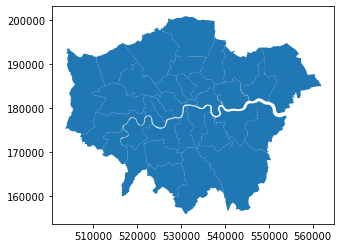

In [13]:
london_map.plot()

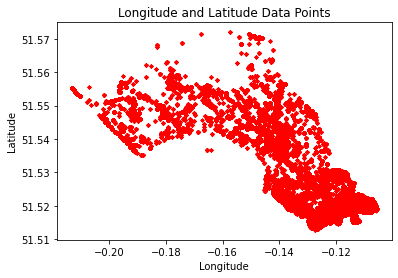

In [14]:
plt.scatter(df['longitude'], df['latitude'], color='red', s=5)

# Set plot title and labels
plt.title('Longitude and Latitude Data Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [16]:
print(london_map.crs)

PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [19]:
from pyproj import CRS

points.crs = CRS.from_epsg(4326)  # Assuming your point data is in WGS84 CRS

# Reproject the point data to British National Grid CRS
points = points.to_crs(london_map.crs)

# Perform the spatial join between the points and London boundary
joined_data = gpd.sjoin(points, london_map, op='within')

# Verify the resulting joined GeoDataFrame
print(joined_data.head())

/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


                                     id     uarn  billingAuthority  \
0  b875f6e3-566e-4624-b8a0-a504b551db8c  4697063              5210   
1  9c27972b-dffc-48ec-9e3e-3812accd5de0  6462063              5210   
2  633a9ae4-85f0-42b2-89c4-0005f420bd7b  6474063              5210   
3  52159b1f-d7b8-4681-9048-319502b7ffb4  6664063              5210   
4  40d287ac-e6ca-49fd-9712-f188cd2476e2  7015063              5210   

  billingReference                 statusDate             address    town  \
0      21733010101  2010-03-05 00:00:00+00:00  180 ARLINGTON ROAD  LONDON   
1   0073700011000B  2010-03-18 00:00:00+00:00     1 BAYHAM STREET  LONDON   
2   007370007B0012  2010-03-18 00:00:00+00:00    7B BAYHAM STREET  LONDON   
3     426000910011  2010-02-23 00:00:00+00:00       9 BAYNES MEWS  LONDON   
4   0109000010001A  2009-12-01 00:00:00+00:00    1 BEDFORD SQUARE  LONDON   

   postcode                       geometry  codeCategory  ... longitude  \
0   NW1 7HL  POINT (528822.749 183844.326

In [35]:
column_data = lambeth['rentalValuation']
column_data.dropna(inplace=True)

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt

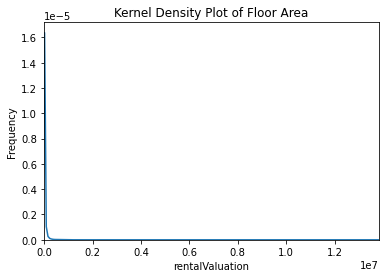

In [37]:
sns.kdeplot(column_data)
plt.xlabel('rentalValuation')
plt.ylabel('Frequency')
plt.title('Kernel Density Plot of Floor Area')

# Adjust x-axis limits
plt.xlim(0, max(column_data))  # Set the limits according to your data range

plt.show()

Text(0.5, 1.0, 'City of London')

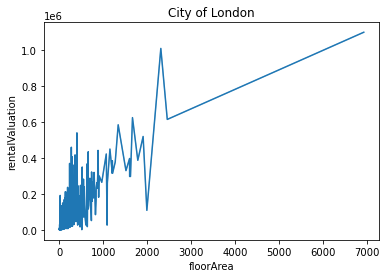

In [88]:
cityldnprop = cityofldn.query("category == 'RETAIL'")
sns.lineplot(data=cityldnprop, x="floorArea", y="rentalValuation")
plt.title('City of London')

Text(0.5, 1.0, 'Camden')

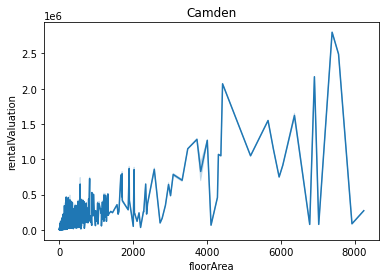

In [89]:
camdenpropertiesleis = camden.query("category == 'RETAIL'")
sns.lineplot(data=camdenpropertiesleis, x="floorArea", y="rentalValuation")
plt.title('Camden')

Text(0.5, 1.0, 'Lambeth')

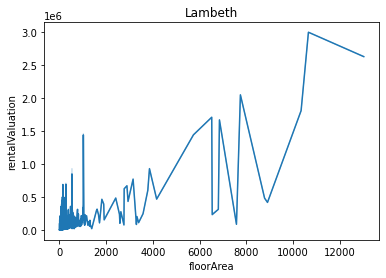

In [90]:
lambethprop = lambeth.query("category == 'RETAIL'")
sns.lineplot(data=lambethprop, x="floorArea", y="rentalValuation")
plt.title('Lambeth')

In [40]:
cityldn_data = cityofldn.dropna(subset=['ratesPaid'])


In [83]:
bot_50 = cityldn_data.nsmallest(50, 'ratesPaid')

In [84]:
top_10_names = bot_50['name']


In [85]:
top_10_names = bot_50['name']


In [86]:
std_dev = bot_50['ratesPaid'].std()
mean_val = bot_50['ratesPaid'].mean()
median_val = bot_50['ratesPaid'].median()


In [87]:
print("Bottom 50 Rates City of London:")
print(bot_50[['name', 'ratesPaid']])
print("Standard Deviation:", std_dev)
print("Mean:", mean_val)
print("Median:", median_val)


Bottom 50 Rates City of London:
                                                   name  ratesPaid
130                          BLACKWATER INVESTMENTS LTD        0.0
213                           EVERYTHING EVERYWHERE LTD        0.0
239                           EVERYTHING EVERYWHERE LTD        0.0
290                   STARBUCKS COFFEE COMPANY (UK) LTD        0.0
297             F AND C COMMERCIAL PROPERTYHOLDINGS LTD        0.0
298             F AND C COMMERCIAL PROPERTYHOLDINGS LTD        0.0
427                        BHL COST CONSULTANTS LIMITED        0.0
428                                   THINK SUPPORT LTD        0.0
429                    CITY OF LONDON BARBICANCOMMITTEE        0.0
430                    CITY OF LONDON BARBICANCOMMITTEE        0.0
452                               LEAFGREEN ESTATES LTD        0.0
475                           EVERYTHING EVERYWHERE LTD        0.0
479                           EVERYTHING EVERYWHERE LTD        0.0
494                           

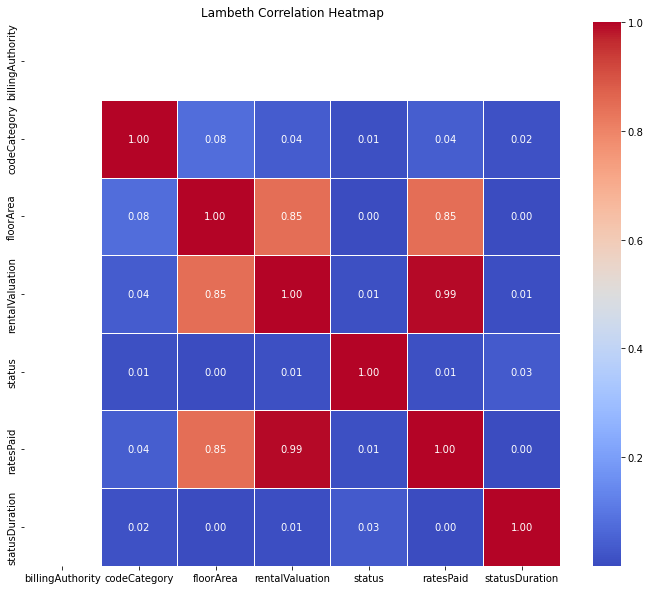

In [99]:
columns = ['id', 'billingAuthority', 'billingReference', 'statusDate', 'codeCategory', 'subCategory', 'category', 'floorArea', 'rentalValuation', 'status', 'ratesPaid', 'statusDuration', 'period', 'name', 'geocode']

# Create a subset DataFrame with the selected columns
subset_df = lambeth[columns]
subset_df = subset_df.dropna()

# Create a correlation matrix for the subset DataFrame
correlation_matrix = subset_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Lambeth Correlation Heatmap")
plt.show()

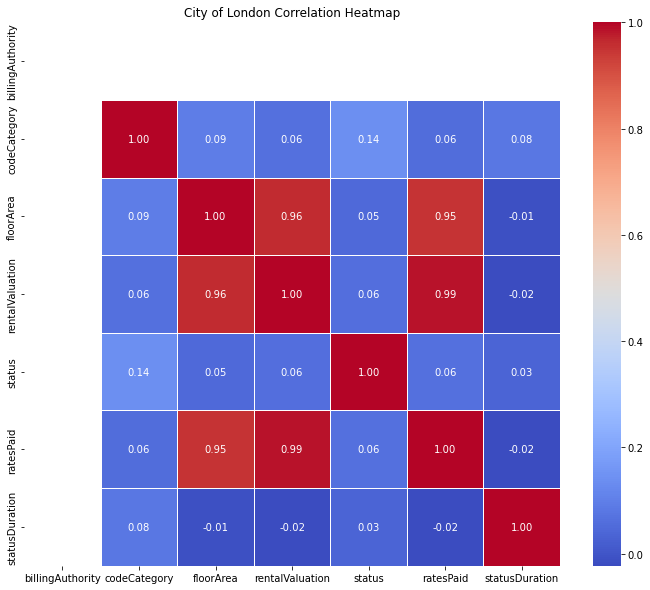

In [98]:
columns = ['id', 'billingAuthority', 'billingReference', 'statusDate', 'codeCategory', 'subCategory', 'category', 'floorArea', 'rentalValuation', 'status', 'ratesPaid', 'statusDuration', 'period', 'name', 'geocode']

# Create a subset DataFrame with the selected columns
subset_df = cityofldn[columns]
subset_df = subset_df.dropna()

# Create a correlation matrix for the subset DataFrame
correlation_matrix = subset_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("City of London Correlation Heatmap")
plt.show()

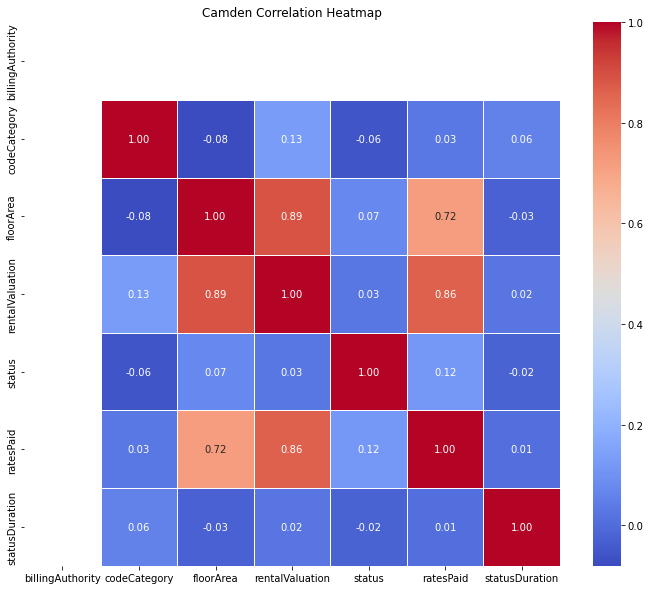

In [97]:
columns = ['id', 'billingAuthority', 'billingReference', 'statusDate', 'codeCategory', 'subCategory', 'category', 'floorArea', 'rentalValuation', 'status', 'ratesPaid', 'statusDuration', 'period', 'name', 'geocode']

# Create a subset DataFrame with the selected columns
subset_df = camden[columns]
subset_df = subset_df.dropna()

# Create a correlation matrix for the subset DataFrame
correlation_matrix = subset_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Camden Correlation Heatmap")
plt.show()

In [161]:
# Descriptive Statistics
rental_valuation_stats = camden['rentalValuation'].describe()
print("Descriptive Statistics for 'rentalValuation':")
print(rental_valuation_stats)

# Correlation Analysis
correlation_matrix = camden[['rentalValuation', 'statusDuration']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

Descriptive Statistics for 'rentalValuation':
count    7.926600e+05
mean     7.192471e+04
std      3.598463e+05
min      2.000000e+00
25%      5.700000e+03
50%      1.725000e+04
75%      4.675000e+04
max      2.050000e+07
Name: rentalValuation, dtype: float64

Correlation Matrix:
                 rentalValuation  statusDuration
rentalValuation         1.000000        0.043421
statusDuration          0.043421        1.000000


In [162]:
rental_valuation_stats = cityofldn['rentalValuation'].describe()
print("Descriptive Statistics for 'rentalValuation':")
print(rental_valuation_stats)

# Correlation Analysis
correlation_matrix = cityofldn[['rentalValuation', 'statusDuration']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

Descriptive Statistics for 'rentalValuation':
count    6.553500e+04
mean     5.709033e+04
std      2.335015e+05
min      8.000000e+01
25%      3.500000e+03
50%      1.050000e+04
75%      4.375000e+04
max      9.990000e+06
Name: rentalValuation, dtype: float64

Correlation Matrix:
                 rentalValuation  statusDuration
rentalValuation         1.000000       -0.029981
statusDuration         -0.029981        1.000000


In [163]:
rental_valuation_stats = lambeth['rentalValuation'].describe()
print("Descriptive Statistics for 'rentalValuation':")
print(rental_valuation_stats)

# Correlation Analysis
correlation_matrix = lambeth[['rentalValuation', 'statusDuration']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

Descriptive Statistics for 'rentalValuation':
count    3.971090e+05
mean     3.868698e+04
std      2.378056e+05
min      5.100000e+01
25%      5.000000e+03
50%      1.025000e+04
75%      2.300000e+04
max      1.383000e+07
Name: rentalValuation, dtype: float64

Correlation Matrix:
                 rentalValuation  statusDuration
rentalValuation         1.000000        0.001457
statusDuration          0.001457        1.000000


In [124]:
activity.columns

Index(['Unnamed: 0', 'date', 'area_name', 'area_code',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [107]:
selected_areas = ['Camden', 'City of London', 'Lambeth']
filtered_data = activity[activity['area_name'].isin(selected_areas)]


In [164]:
camden.head()

,id,uarn,billingAuthority,billingReference,statusDate,address,town,postcode,geometry,codeCategory,...,subCategory,category,floorArea,rentalValuation,status,ratesPaid,statusDuration,period,name,geocode
0,b875f6e3-566e-4624-b8a0-a504b551db8c,4697063,5210,21733010101,2010-03-05 00:00:00+00:00,180 ARLINGTON ROAD,LONDON,NW1 7HL,POINT (-0.143902 51.538808),25,...,LEISURE_AMUSEMENT_AND_ENTERTAINMENT_CENTRES,LEISURE,NaN,104500,True,NaN,NaN,2010-03-31,NaN,E09000007
1,9c27972b-dffc-48ec-9e3e-3812accd5de0,6462063,5210,0073700011000B,2010-03-18 00:00:00+00:00,1 BAYHAM STREET,LONDON,NW1 0ER,POINT (-0.137797 51.534958),203,...,OFFICE_GENERAL,OFFICE,201.30,45250,True,NaN,NaN,2010-03-31,NaN,E09000007
2,633a9ae4-85f0-42b2-89c4-0005f420bd7b,6474063,5210,007370007B0012,2010-03-18 00:00:00+00:00,7B BAYHAM STREET,LONDON,NW1 0EY,POINT (-0.138309 51.535497),203,...,OFFICE_GENERAL,OFFICE,59.30,15750,True,NaN,NaN,2010-03-31,NaN,E09000007
3,52159b1f-d7b8-4681-9048-319502b7ffb4,6664063,5210,426000910011,2010-02-23 00:00:00+00:00,9 BAYNES MEWS,LONDON,NW3 5BH,POINT (-0.172747 51.548766),96,...,INDUSTRIAL_GENERAL,INDUSTRIAL,47.28,10000,True,NaN,NaN,2010-03-31,NaN,E09000007
4,40d287ac-e6ca-49fd-9712-f188cd2476e2,7015063,5210,0109000010001A,2009-12-01 00:00:00+00:00,1 BEDFORD SQUARE,LONDON,WC1B 3RA,POINT (-0.129063 51.51948),203,...,OFFICE_GENERAL,OFFICE,397.60,131000,True,NaN,NaN,2010-03-31,NaN,E09000007


In [168]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


columns_for_clustering = ['floorArea', 'rentalValuation']

camden = camden.dropna(subset=columns_for_clustering)


# Preprocess the data (if needed)
X = camden[columns_for_clustering].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Assign cluster labels to the data
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
camden['cluster'] = cluster_labels

# Analyze the clusters
cluster_analysis = camden.groupby('cluster')[columns_for_clustering].mean()
print(cluster_analysis)

            floorArea  rentalValuation
cluster                               
0          122.994261     4.066312e+04
1        12403.837026     5.151803e+06
2         2696.783746     8.535239e+05


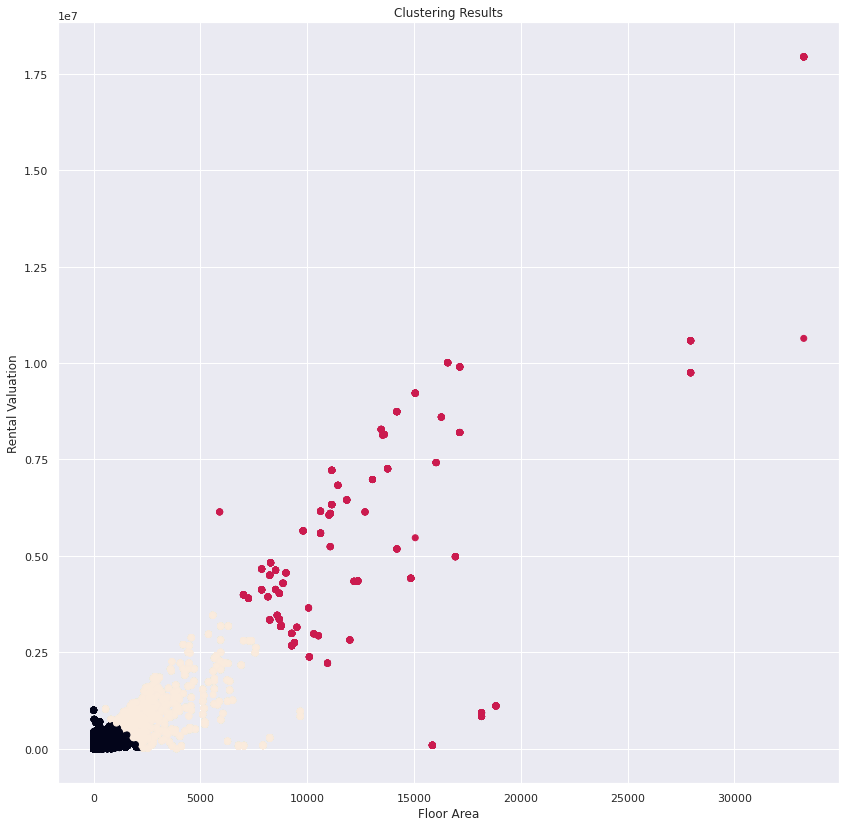

In [169]:
plt.scatter(camden['floorArea'], camden['rentalValuation'], c=camden['cluster'])
plt.xlabel('Floor Area')
plt.ylabel('Rental Valuation')
plt.title('Clustering Results')
plt.show()

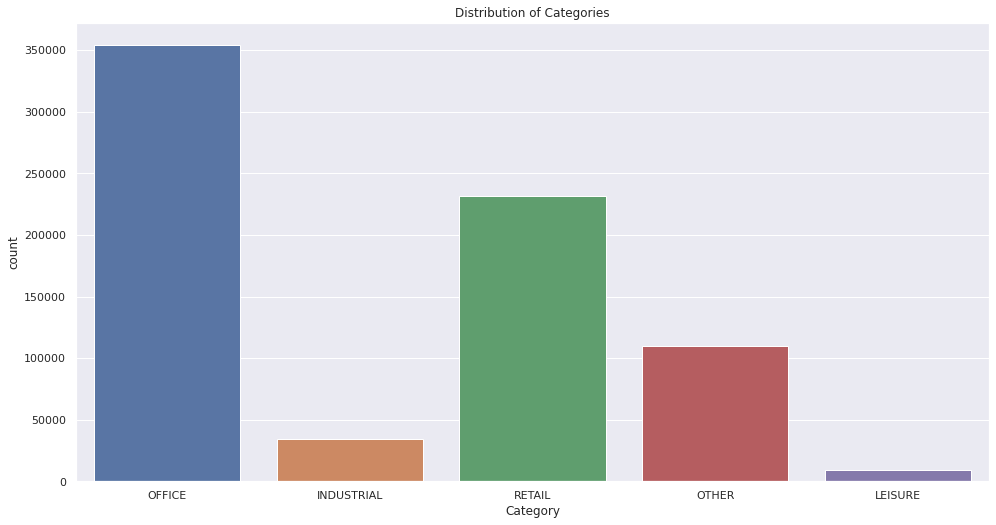

In [171]:

plt.subplot(2, 1, 2)
sns.countplot(data=camden, x='category')
plt.title('Distribution of Categories')
plt.xlabel('Category')

plt.tight_layout()
plt.show()

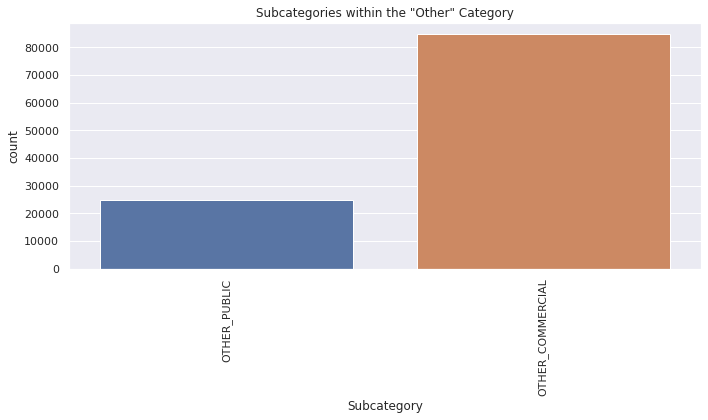

In [175]:
other_category_data = camden[camden['category'] == 'OTHER']

# Create a count plot for subcategories within the 'other' category
plt.figure(figsize=(10, 6))
sns.countplot(data=other_category_data, x='subCategory')
plt.title('Subcategories within the "Other" Category')
plt.xlabel('Subcategory')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

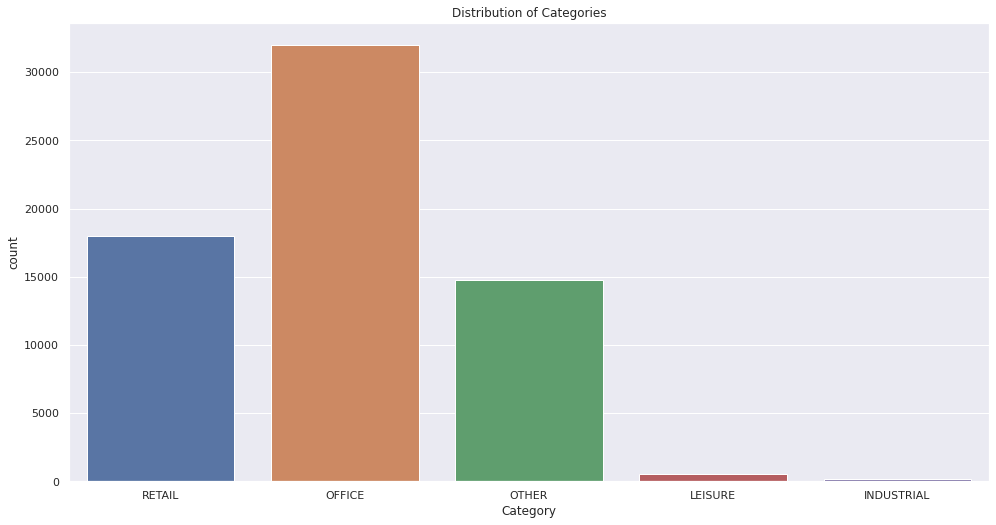

In [172]:

plt.subplot(2, 1, 2)
sns.countplot(data=cityofldn, x='category')
plt.title('Distribution of Categories')
plt.xlabel('Category')

plt.tight_layout()
plt.show()

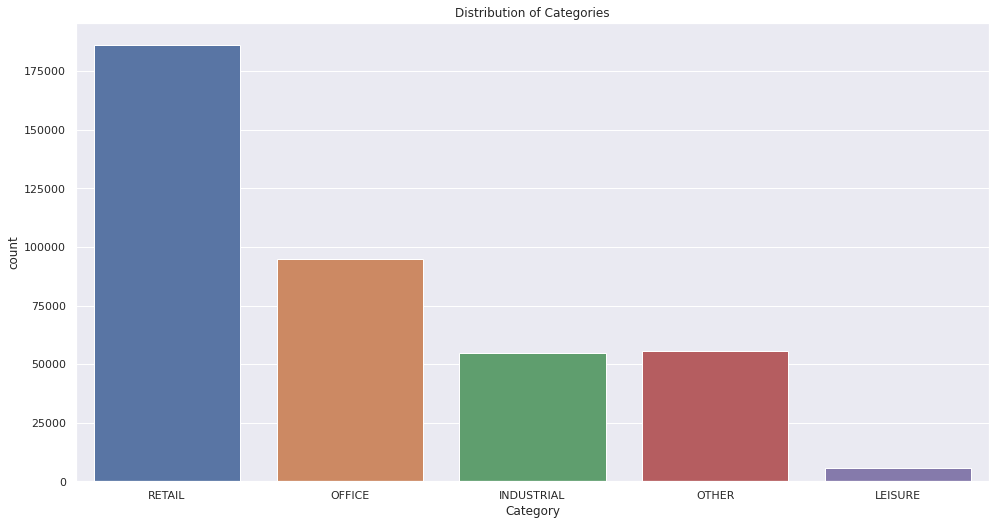

In [173]:

plt.subplot(2, 1, 2)
sns.countplot(data=lambeth, x='category')
plt.title('Distribution of Categories')
plt.xlabel('Category')

plt.tight_layout()
plt.show()

In [109]:
import matplotlib.dates as mdates


In [136]:
activity['date'] = pd.to_datetime(activity['date'], format='%Y-%m-%d')


In [139]:
print(activity['date'])

0       2022-10-15
1       2022-10-15
2       2022-10-15
3       2022-10-15
4       2022-10-15
           ...    
32137   2020-02-15
32138   2020-02-15
32139   2020-02-15
32140   2020-02-15
32141   2020-02-15
Name: date, Length: 32142, dtype: datetime64[ns]


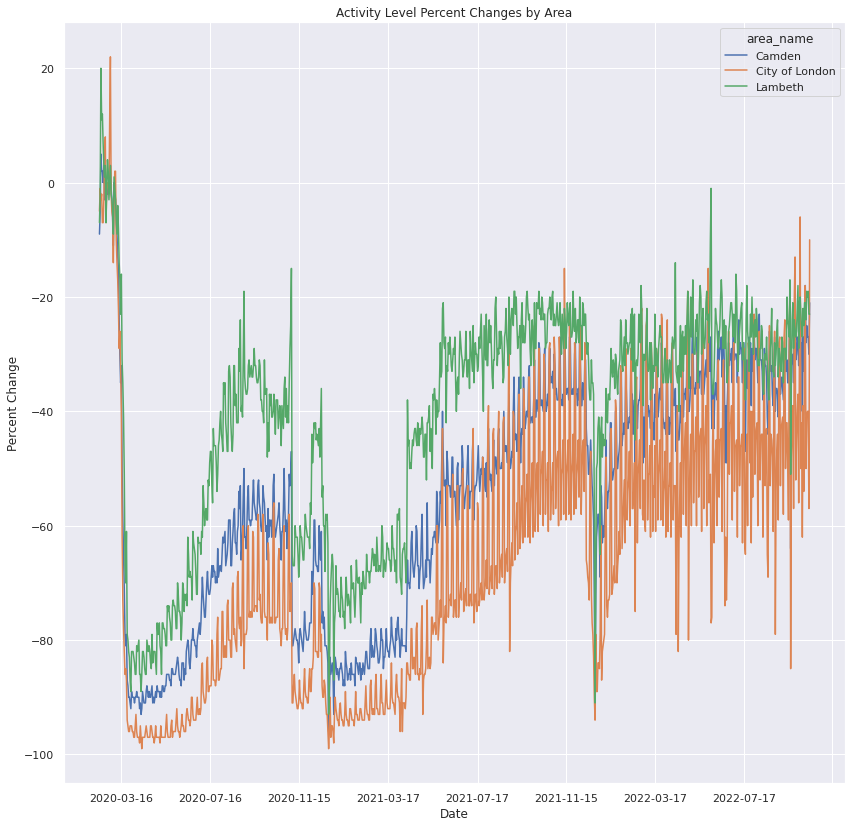

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates





plt.figure(figsize=(14, 14))

# Create the line graph using Seaborn
sns.lineplot(data=filtered_data, x='date', y='retail_and_recreation_percent_change_from_baseline', hue='area_name')

# Format the x-axis labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
# Reverse the x-axis
plt.gca().invert_xaxis()

plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Activity Level Percent Changes by Area')
plt.show()


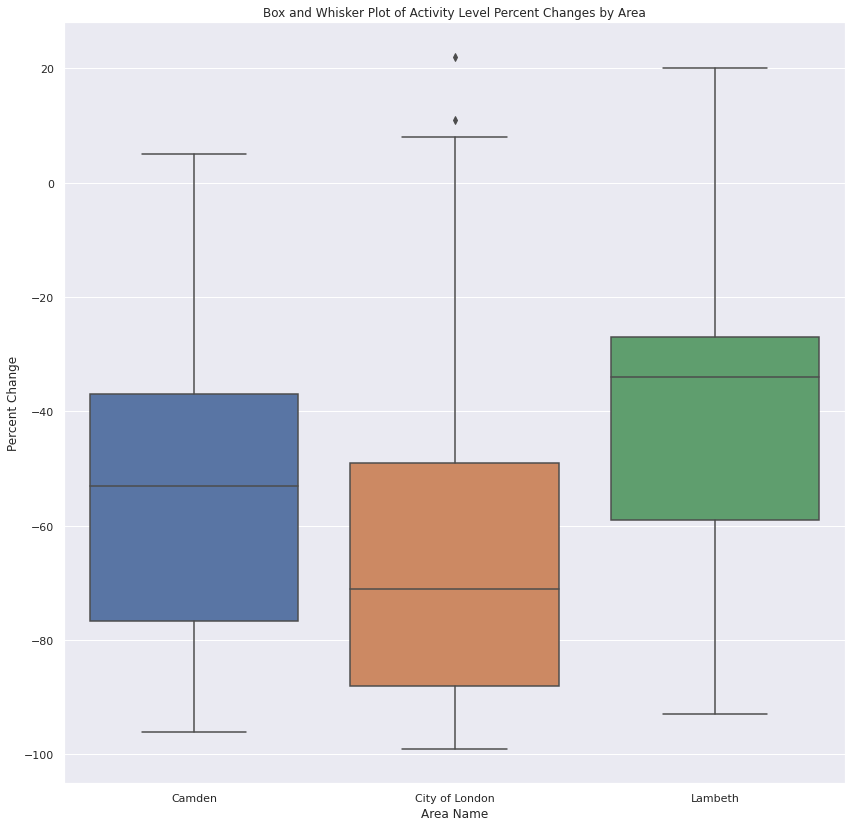

In [151]:
sns.boxplot(data=filtered_data, x='area_name', y='retail_and_recreation_percent_change_from_baseline')

plt.xlabel('Area Name')
plt.ylabel('Percent Change')
plt.title('Box and Whisker Plot of Activity Level Percent Changes by Area')
plt.show()

In [152]:
import pandas as pd

# Filter the data for 'City of London' area_name
city_of_london_data = filtered_data[filtered_data['area_name'] == 'City of London']

# Find the highest and lowest values for 'retail_and_recreation_percent_change_from_baseline'
max_value = city_of_london_data['retail_and_recreation_percent_change_from_baseline'].max()
min_value = city_of_london_data['retail_and_recreation_percent_change_from_baseline'].min()

print("Highest value for 'retail_and_recreation_percent_change_from_baseline' in City of London:", max_value)
print("Lowest value for 'retail_and_recreation_percent_change_from_baseline' in City of London:", min_value)


Highest value for 'retail_and_recreation_percent_change_from_baseline' in City of London: 22.0
Lowest value for 'retail_and_recreation_percent_change_from_baseline' in City of London: -99.0


In [145]:
selected_areas2 = ['Greenwich', 'Barnet', 'Hackney']
filtered_data2 = activity[activity['area_name'].isin(selected_areas2)]


In [148]:
activity['date'] = pd.to_datetime(activity['date'], format='%Y-%m-%d')


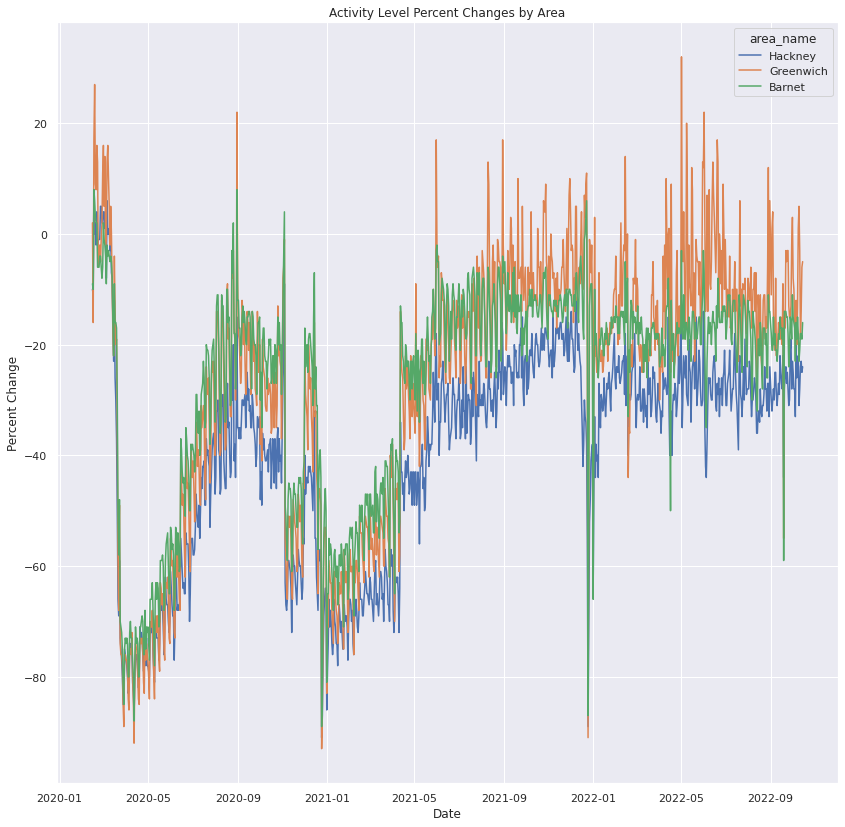

In [150]:

plt.figure(figsize=(14, 14))

# Create the line graph using Seaborn
sns.lineplot(data=filtered_data2, x='date', y='retail_and_recreation_percent_change_from_baseline', hue='area_name')

# Format the x-axis labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
# Reverse the x-axis


#plt.gca().invert_xaxis()

plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.title('Activity Level Percent Changes by Area')
plt.show()

In [157]:
Hackney_data = filtered_data2[filtered_data2['area_name'] == 'Greenwich']
Hackney_data = Hackney_data.dropna(subset=['retail_and_recreation_percent_change_from_baseline'])

#Finding the highest and lowest values for 'retail_and_recreation_percent_change_from_baseline'
max_value = Hackney_data['retail_and_recreation_percent_change_from_baseline'].max()
min_value = Hackney_data['retail_and_recreation_percent_change_from_baseline'].min()

print("Highest value for 'retail_and_recreation_percent_change_from_baseline' in Greenwich:", max_value)
print("Lowest value for 'retail_and_recreation_percent_change_from_baseline' in Greenwich:", min_value)


Highest value for 'retail_and_recreation_percent_change_from_baseline' in Greenwich: 32.0
Lowest value for 'retail_and_recreation_percent_change_from_baseline' in Greenwich: -93.0


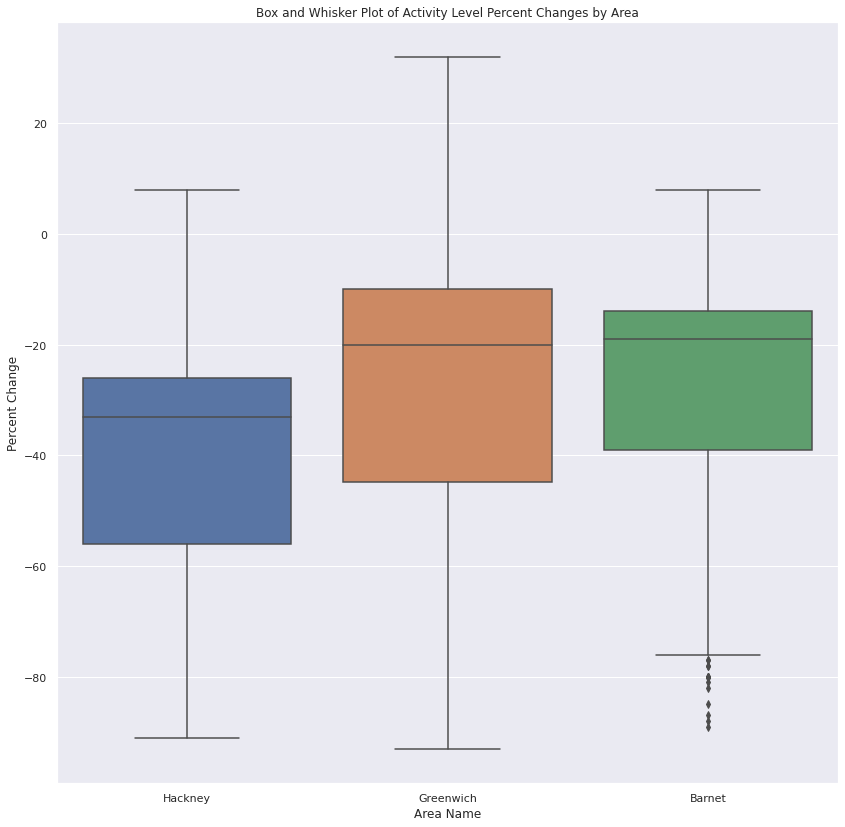

In [158]:
sns.boxplot(data=filtered_data2, x='area_name', y='retail_and_recreation_percent_change_from_baseline')

plt.xlabel('Area Name')
plt.ylabel('Percent Change')
plt.title('Box and Whisker Plot of Activity Level Percent Changes by Area')
plt.show()

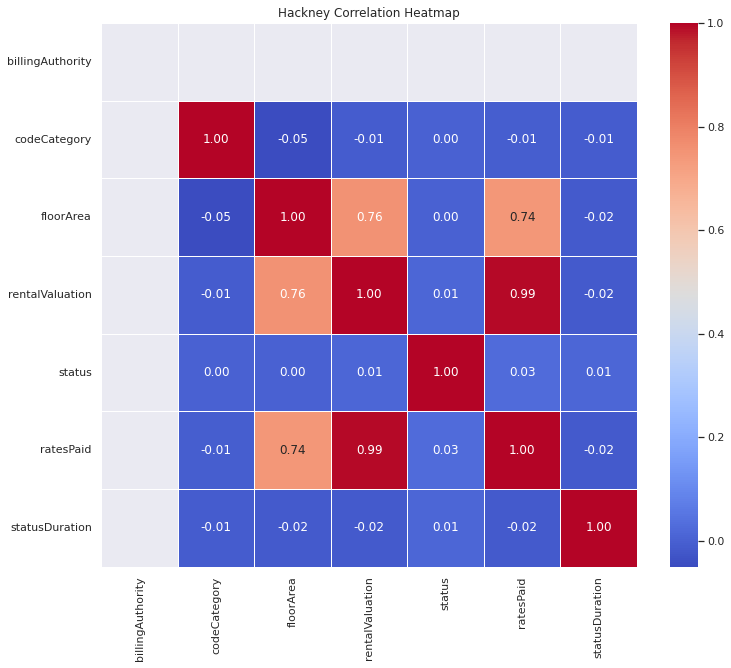

In [183]:
columns = ['id', 'billingAuthority', 'billingReference', 'statusDate', 'codeCategory', 'subCategory', 'category', 'floorArea', 'rentalValuation', 'status', 'ratesPaid', 'statusDuration', 'period', 'name', 'geocode']

# Create a subset DataFrame with the selected columns
subset_df = greenwich[columns]
subset_df = subset_df.dropna()

# Create a correlation matrix for the subset DataFrame
correlation_matrix = subset_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Greenwich Correlation Heatmap")
plt.show()

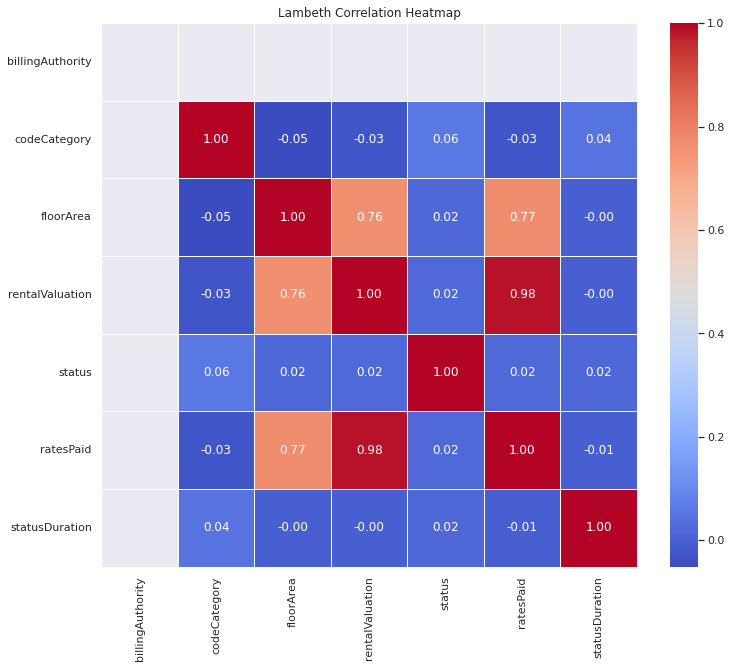

In [184]:
columns = ['id', 'billingAuthority', 'billingReference', 'statusDate', 'codeCategory', 'subCategory', 'category', 'floorArea', 'rentalValuation', 'status', 'ratesPaid', 'statusDuration', 'period', 'name', 'geocode']

# Create a subset DataFrame with the selected columns
subset_df = barnet[columns]
subset_df = subset_df.dropna()

# Create a correlation matrix for the subset DataFrame
correlation_matrix = subset_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Barnet Correlation Heatmap")
plt.show()

In [189]:
columns = ['id', 'billingAuthority', 'billingReference', 'statusDate', 'codeCategory', 'subCategory', 'category', 'floorArea', 'rentalValuation', 'status', 'ratesPaid', 'statusDuration', 'period', 'name', 'geocode']
hackney.fillna(0, inplace=True)
# Create a subset DataFrame with the selected columns
subset_df = hackney[columns]
subset_df = subset_df.dropna()

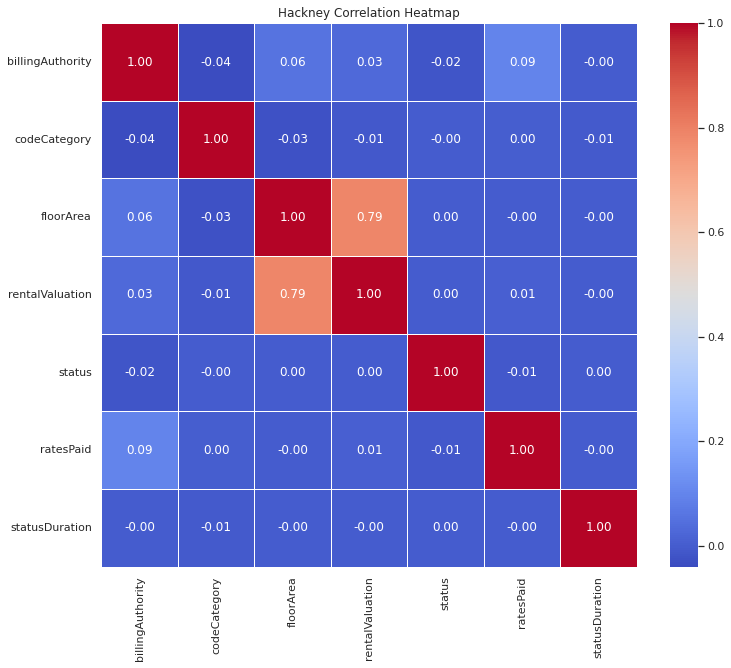

In [191]:


# Create a correlation matrix for the subset DataFrame
correlation_matrix = subset_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Hackney Correlation Heatmap")
plt.show()

In [117]:
import folium


In [28]:
# Read the XLSX file

# Extract the required columns (e.g., latitude, longitude, name)
locations = df[['latitude', 'longitude']]
names = df['uarn']



In [29]:
camden_coords = [51.5362, -0.1406]

# Create a folium map centered on Camden
map = folium.Map(location=camden_coords, zoom_start=13)

In [30]:
folium.TileLayer('OpenStreetMap').add_to(map)

In [31]:
for location, name in zip(locations.values, names):
    lat, lon = location

    # Add a marker for each location
    marker = folium.Marker(location=[lat, lon], popup=name)
    marker.add_to(map)


In [1]:
# Save the map as an HTML file
map.save('map.html')

# Display the map in a Jupyter Notebook or IDE
map


AttributeError: type object 'map' has no attribute 'save'